In [61]:
%pip install biopython python-Levenshtein matplotlib

Note: you may need to restart the kernel to use updated packages.


In [62]:
# Step 1: Import Library
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction, molecular_weight
from Bio.Seq import Seq
from Bio import pairwise2
import matplotlib.pyplot as plt
import Levenshtein

In [63]:
# Step 2: Load Sequences from FASTA files
seqA = next(SeqIO.parse("a.fasta", "fasta")).seq
seqB = next(SeqIO.parse("b.fasta", "fasta")).seq

print("Sequence A:", seqA)
print("Sequence B:", seqB)

Sequence A: ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGCGATTCGATGGCTAGGTCCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTG

In [64]:
print ("1. Sequence Manipulation")

print("\n")

print ("a. Total Length")
print("Length of Sequence A:", len(seqA))
print("Length of Sequence B:", len(seqB))

print("\n")

print("b. Index of First Time Codon (TAC)")
index_tac_A = seqA.find("TAC")
index_tac_B = seqB.find("TAC")
print("Index of TAC in A:", index_tac_A)
print("Index of TAC in B:", index_tac_B)

print("\n")

print("C. Create sequence C")
part_A = seqA[:-10]
part_B = seqB[-15:]
seqC = (part_A + part_B)[::-1]
print("Sequences C:", seqC)


1. Sequence Manipulation


a. Total Length
Length of Sequence A: 1883
Length of Sequence B: 1050


b. Index of First Time Codon (TAC)
Index of TAC in A: 507
Index of TAC in B: 85


C. Create sequence C
Sequences C: CAGCTGAAAGCGGACGTACCTTGTCGAAATAAATCCTCCTTTTCGTGTTCACTCACACCAAGGTCCCTCTCGACACTCGGTCCCAAACTCCGGGTCCGCCTCCTGACGCCCGCTCAGGAGTGGAGACGACCCCTCCGAGTACCGTACTGAAGGAGTCAGGAGTCACCAACGCAGGGTCCGGGTACGCTCGTCTGTCCTTGTGACGCCACACGTACCGTCTCCCGAGGGCAAAGTCGTTACGTCAGTCAGCCACGTCCGCTACTCTCCCGTACAGACCGCAGGGGCGGACACCCGTCCGAGACCCTAGGGTCGACTGGCTTGACCCCTCTTCCTTACAAGTCCTTAGCCGCTCGTGGTACGAGACGTCGGCCGAGAGGTCCCCCTGTAGCGAGAGACGGGGAAACAAAAACGACGGGAGGACGACGAAGAAGACGAAGAAGCTACCGAGGACCAGTTACCCGCGTCCGAAGTGTTTCCCTTAGTCAAGAACCTCTGGACCGCCGTACTTGAGGAAGTTGAAGAGCCCGTGCTGCTACGGGAAGAGGCAGACCATCAAGAGGTCCTACCGCGTCTACCACGCCCATCACCGTGTGTACCACCGCAACTCGTACACCTGTTTGAGGTGGAACAGGTAGTAGAAGAACCAAACGGGCATAGCCTAAGCCTCCGCCGCTCGGACCATCAGACACGTCAATCTTGTCCTCTGGTCGAGGGCCTTCCGAGGGCTCGGGCCTTTGGTCCGGAGGTCCAGTTCGAAGAATGACCGTCGCACTAAGTTTCTTGGA

2. Sequence Analysis & Plotting


a. Nucleotide Frequencies & Plotting


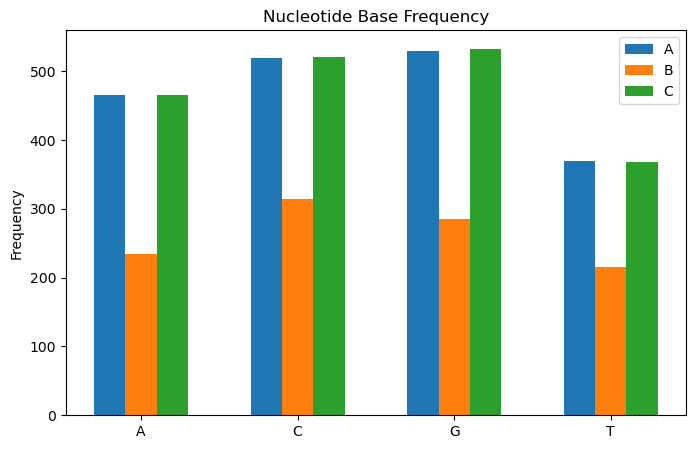



b. GC and AT Content Percentage
GC/AT % for A: (55.70897503983006, 44.29102496016994)
GC/AT % for B: (57.23809523809524, 42.76190476190476)
GC/AT % for C: (55.82627118644068, 44.17372881355932)


c. Melting Temperature using Wallace Rule
Melting Temp A: 5864
Melting Temp B: 3302
Melting Temp C: 5884


d. Molecular Weight
Molecular Weight A: 582470.8098000064
Molecular Weight B: 323955.0287000012
Molecular Weight C: 584045.8044000099


In [65]:
print("2. Sequence Analysis & Plotting")

print("\n")

# Helper function to count bases
def count_bases(seq):
    return {base: seq.count(base) for base in 'ACGT'}

print("a. Nucleotide Frequencies & Plotting") 
counts_A = count_bases(seqA)
counts_B = count_bases(seqB)
counts_C = count_bases(seqC)

labels = list('ACGT')
x = range(len(labels))
width = 0.2

plt.figure(figsize=(8, 5))
plt.bar([i - width for i in x], [counts_A[b] for b in labels], width=width, label='A')
plt.bar(x, [counts_B[b] for b in labels], width=width, label='B')
plt.bar([i + width for i in x], [counts_C[b] for b in labels], width=width, label='C')
plt.xticks(x, labels)
plt.ylabel("Frequency")
plt.title("Nucleotide Base Frequency")
plt.legend()
plt.show()

print("\n")

print("b. GC and AT Content Percentage")
def gc_at_content(seq):
    gc = gc_fraction(seq) * 100
    at = 100 - gc
    return gc, at

print("GC/AT % for A:", gc_at_content(seqA))
print("GC/AT % for B:", gc_at_content(seqB))
print("GC/AT % for C:", gc_at_content(seqC))

print("\n")

print("c. Melting Temperature using Wallace Rule")
def melting_temp (seq):
    return 2 * (seq.count("A") + seq.count("T")) + 4 * (seq.count("G") + seq.count("C"))

print("Melting Temp A:", melting_temp(seqA))
print("Melting Temp B:", melting_temp(seqB))
print("Melting Temp C:", melting_temp(seqC))

print("\n")

print("d. Molecular Weight")
print("Molecular Weight A:", molecular_weight(seqA, seq_type='DNA'))
print("Molecular Weight B:", molecular_weight(seqB, seq_type='DNA'))
print("Molecular Weight C:", molecular_weight(seqC, seq_type='DNA'))


In [66]:
print("3. Transcribe to mRNA")

print("\n")

print("a. Transcribe to mRNA")
mRNA_A = seqA.transcribe()
mRNA_B = seqB.transcribe()
mRNA_C = seqC.transcribe()

print("mRNA A:", mRNA_A)
print("mRNA B:", mRNA_B)
print("mRNA C:", mRNA_C)

print("\n")

print("b. Translate to Protein")
print("Protein A:", mRNA_A.translate(to_stop=True))
print("Protein B:", mRNA_B.translate(to_stop=True))
print("Protein C:", mRNA_C.translate(to_stop=True))

3. Transcribe to mRNA


a. Transcribe to mRNA
mRNA A: AUGGUGUUGGAUCUGGACUUGUUUCGGACGGAUAAAGGAGGAGACCCGGACCGCAUCCGAGAGACGCAAAAGAACCGCUUCAAGGACCCGGGACUCGUGGAUCGGCUGGUGAAGGCGGACGGCGAGUGGCGAAAAUGCAGAUUUCAGACCGACAACUUGAACAAGCUGAAGAACCUAUGCAGCAAGACAAUUGGAGAGAAAAUGAAGAAAAAAGAGCCAGUGGGAAAUGAUGAGUCCAUUCCGGAGAACUUGUUAAAUCUCGAUGACCUCACUUCAGACACUUUAGCUAACCUGAAAGUGUCACAGAUCAAAAAACUCCGACUCCUCAUCGACGAAGCCAUCCUGAAGUGUGACGCCCAGCGGAUAAAGCUGCAGGAAUAGCGGUUUGAGAACCUCCGCGAGCGAUUCGAUGGCUAGGUCCUGCAUCCCUCGGUGCCCAUCAGUAACGAUGAGGAUGCGGACAACAAAGUCGAGAGGAUCUGGGGUGACUGCACCGUCAAGAAGAAGUACUCGCACGUGGACCUGGUGGUGAUGGUCGAUGGCUUUGAAGGCGAAAAAGGGGUCGUGGUGGCUGGCAGUCGAGGGUACUUCCUGAAGGGGCCCCUGGUGUUCCUGGAACAGGCGCUCAUCCAGUACGCCCUUCGCACCUUGGGAAGUCGGGGCUACAUUCCCAUUUACACCCCGUUUUUCAUGAGGAAGGAGGUCAUGCAGGAGGUGGCACAGCUCAGCCAGUUUGAUGAAGAGCUUUACAAGGUGAUUGGCAAAGGCAGUGAAAAGUCUGACGACAACUCCUACGAUGAGAAAUACCUGAUUGCCACCUCCGAGCAGCCCAUCGCUGCUCUCCACCGAGAUGAGUGGCUACGGCCAGAGGAUUUGCCCAUCAAGUAUGCUGGCCUGUCCACCUGCUUUCGCCAGGAGGUGGGCUCCCACGGCCGGGACACCCGCG

c:\Users\willsens kiren alexa\anaconda3\lib\site-packages\Bio\Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [67]:
print("4. Sequence Alignment & Similarity")

print("\n")

print("a. Local Alignment A vs CGCTACTAGCATGCGCAT ")
target_1 = "CGCTACTAGCATGCGCAT"
local_alignments = pairwise2.align.localxx(seqA, target_1)
print("Local Alignment Score A vs target1:", local_alignments[0].score)

print("\n")

print("b. Global Alignment B vs CAGTGCGCTAGCAGCTACGTGTG")
target_2 = "CAGTGCGCTAGCAGCTACGTGTG"
global_alignments = pairwise2.align.globalxx(seqB, target_2)
print("Global Alignment Score B vs target2:", global_alignments[0].score)

print("\n")

print("c. Levenshtein Distance")
lev_distance = Levenshtein.distance(str(seqA), str(seqB))
print("Levenshtein Distance A vs B:", lev_distance)

4. Sequence Alignment & Similarity


a. Local Alignment A vs CGCTACTAGCATGCGCAT 
Local Alignment Score A vs target1: 18.0


b. Global Alignment B vs CAGTGCGCTAGCAGCTACGTGTG
Global Alignment Score B vs target2: 23.0


c. Levenshtein Distance
Levenshtein Distance A vs B: 1039
